In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
data = pd.read_csv('demand_monthly_enriched.csv')
data = data.iloc[:,1:]
data.head()

,Collection,BrandLine,Material,StyleCode,GridValue,Style,Region,Size,Color,Month,...,Glasses_3m_avg,Sunglasses_3m_avg,Glasses_pct_change,Sunglasses_pct_change,Trend_acetate_frame_glasses,Trend_Calvin_Klein_frames,Trend_FSA_glasses,Trend_metal_frame_glasses,Trend_Lacoste_frames,Trend_Nike_frames
0,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2023-09,...,41.0,31.0,20.00%,-20.83%,0,65,19,35,78,60
1,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2023-10,...,40.0,27.0,-10.42%,0.00%,12,70,24,37,63,58
2,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2023-11,...,42.0,23.0,6.98%,0.00%,17,60,41,33,63,73
3,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2023-12,...,44.0,21.0,2.17%,-15.79%,14,90,57,32,78,93
4,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2024-01,...,46.0,19.0,2.13%,18.75%,20,75,35,39,67,67


In [109]:
data.shape

(17568, 31)

In [110]:
data.columns

Index(['Collection', 'BrandLine', 'Material', 'StyleCode', 'GridValue',
       'Style', 'Region', 'Size', 'Color', 'Month', 'Demand', 'Color_Base',
       'Color_Finish', 'Is_Multicolor', 'OpticalOrSun', 'BrandName',
       'Brand_Tier', 'Lookalike_ID', 'Date', 'Glasses', 'Sunglasses',
       'Glasses_3m_avg', 'Sunglasses_3m_avg', 'Glasses_pct_change',
       'Sunglasses_pct_change', 'Trend_acetate_frame_glasses',
       'Trend_Calvin_Klein_frames', 'Trend_FSA_glasses',
       'Trend_metal_frame_glasses', 'Trend_Lacoste_frames',
       'Trend_Nike_frames'],
      dtype='object')

**Adding Style Info**

In [111]:
style = pd.read_csv('styles.csv')
style.head()

,Collection,BrandLine,Material,Shape,FrameType,StyleCode,GridValue,Style,Region
0,KC,CALVIN KLEIN SUN,Plastic,Butterfly,Full,CK20541S,5719001,CK20541S/57/BLACK,AMER
1,KC,CALVIN KLEIN SUN,Plastic,Butterfly,Full,CK20541S,5719001,CK20541S/57/BLACK,EMEA
2,KC,CALVIN KLEIN SUN,Plastic,Butterfly,Full,CK20541S,5719235,CK20541S/57/DARK TOR,AMER
3,KC,CALVIN KLEIN SUN,Plastic,Butterfly,Full,CK20541S,5719235,CK20541S/57/DARK TOR,EMEA
4,KC,CALVIN KLEIN SUN,Plastic,Butterfly,Full,CK20541S,5719605,CK20541S/57/CRYSTAL,AMER


In [112]:
style.shape

(1464, 9)

In [113]:
style = style.drop_duplicates(subset='StyleCode', keep='first')

In [114]:
style.shape

(220, 9)

In [115]:
data = data.merge(style[['Material','Shape','FrameType','StyleCode']],on='StyleCode',how='left')
data.head()

,Collection,BrandLine,Material_x,StyleCode,GridValue,Style,Region,Size,Color,Month,...,Sunglasses_pct_change,Trend_acetate_frame_glasses,Trend_Calvin_Klein_frames,Trend_FSA_glasses,Trend_metal_frame_glasses,Trend_Lacoste_frames,Trend_Nike_frames,Material_y,Shape,FrameType
0,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2023-09,...,-20.83%,0,65,19,35,78,60,Plastic,Oval,Half
1,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2023-10,...,0.00%,12,70,24,37,63,58,Plastic,Oval,Half
2,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2023-11,...,0.00%,17,60,41,33,63,73,Plastic,Oval,Half
3,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2023-12,...,-15.79%,14,90,57,32,78,93,Plastic,Oval,Half
4,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2024-01,...,18.75%,20,75,35,39,67,67,Plastic,Oval,Half


In [116]:
data['Material'] = data['Material_y']
data.drop(columns=['Material_x','Material_y'],inplace=True)

In [117]:
data.head(5)

,Collection,BrandLine,StyleCode,GridValue,Style,Region,Size,Color,Month,Demand,...,Sunglasses_pct_change,Trend_acetate_frame_glasses,Trend_Calvin_Klein_frames,Trend_FSA_glasses,Trend_metal_frame_glasses,Trend_Lacoste_frames,Trend_Nike_frames,Shape,FrameType,Material
0,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2023-09,6.0,...,-20.83%,0,65,19,35,78,60,Oval,Half,Plastic
1,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2023-10,10.0,...,0.00%,12,70,24,37,63,58,Oval,Half,Plastic
2,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2023-11,2.0,...,0.00%,17,60,41,33,63,73,Oval,Half,Plastic
3,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2023-12,2.0,...,-15.79%,14,90,57,32,78,93,Oval,Half,Plastic
4,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2024-01,8.0,...,18.75%,20,75,35,39,67,67,Oval,Half,Plastic


In [118]:
data.shape

(17568, 33)

**Seasonality**

In [119]:
data['Date'] = pd.to_datetime(data['Month'])
data.drop(columns='Month',inplace=True)

In [120]:
#seasonality

summer = []
holiday_season = []
insurance_reset = []

for i in range(len(data)):
    if data.loc[i,'Date'].month >= 6 and data.loc[i,'Date'].month <= 8:
        summer.append(1)
    else:
        summer.append(0)
        
for i in range(len(data)):
    if data.loc[i,'Date'].month == 11 or data.loc[i,'Date'].month == 12:
        holiday_season.append(1)
    else:
        holiday_season.append(0)
        
for i in range(len(data)):
    if data.loc[i,'Date'].month == 1:
        insurance_reset.append(1)
    else:
        insurance_reset.append(0)
        
data['is_summer'] = summer
data['is_holiday_season'] = holiday_season
data['is_insurance_reset'] = insurance_reset

In [121]:
data.head(10)

,Collection,BrandLine,StyleCode,GridValue,Style,Region,Size,Color,Demand,Color_Base,...,Trend_FSA_glasses,Trend_metal_frame_glasses,Trend_Lacoste_frames,Trend_Nike_frames,Shape,FrameType,Material,is_summer,is_holiday_season,is_insurance_reset
0,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,6.0,Unknown,...,19,35,78,60,Oval,Half,Plastic,0,0,0
1,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,10.0,Unknown,...,24,37,63,58,Oval,Half,Plastic,0,0,0
2,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2.0,Unknown,...,41,33,63,73,Oval,Half,Plastic,0,1,0
3,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2.0,Unknown,...,57,32,78,93,Oval,Half,Plastic,0,1,0
4,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,8.0,Unknown,...,35,39,67,67,Oval,Half,Plastic,0,0,1
5,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,6.0,Unknown,...,28,40,85,66,Oval,Half,Plastic,0,0,0
6,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,7.0,Unknown,...,27,35,30,62,Oval,Half,Plastic,0,0,0
7,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,11.0,Unknown,...,22,35,81,63,Oval,Half,Plastic,0,0,0
8,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,8.0,Unknown,...,18,41,48,57,Oval,Half,Plastic,0,0,0
9,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,10.0,Unknown,...,21,42,37,60,Oval,Half,Plastic,1,0,0


In [122]:
# trends = pd.read_csv('opticalsun_googletrends.csv')
# trends['Date'] = pd.to_datetime(trends['Time'])
# trends.drop(columns='Time',inplace=True)
# trends.head()

In [123]:
# data = data.merge(trends[['Date','Glasses_3m_avg','Sunglasses_3m_avg','Glasses_pct_change','Sunglasses_pct_change']],on='Date',how='left')
# data.head()

In [124]:
data_4m_demand = data.sort_values(['Region','GridValue','Date'])
data_4m_demand['4m_demand'] = (data.groupby(['Region','GridValue']))['Demand'].transform(lambda x: x.shift(-1).iloc[::-1].rolling(4).sum().iloc[::-1])
data_4m_demand[['BrandLine','Style','Date','Demand','4m_demand']].head(15)

,BrandLine,Style,Date,Demand,4m_demand
0,NIKE OPTICAL,NIKE RX CLIP III VIC,2023-09-01,6.0,22.0
1,NIKE OPTICAL,NIKE RX CLIP III VIC,2023-10-01,10.0,18.0
2,NIKE OPTICAL,NIKE RX CLIP III VIC,2023-11-01,2.0,23.0
3,NIKE OPTICAL,NIKE RX CLIP III VIC,2023-12-01,2.0,32.0
4,NIKE OPTICAL,NIKE RX CLIP III VIC,2024-01-01,8.0,32.0
5,NIKE OPTICAL,NIKE RX CLIP III VIC,2024-02-01,6.0,36.0
6,NIKE OPTICAL,NIKE RX CLIP III VIC,2024-03-01,7.0,32.0
7,NIKE OPTICAL,NIKE RX CLIP III VIC,2024-04-01,11.0,25.0
8,NIKE OPTICAL,NIKE RX CLIP III VIC,2024-05-01,8.0,NaN
9,NIKE OPTICAL,NIKE RX CLIP III VIC,2024-06-01,10.0,NaN


In [125]:
data_4m_demand.shape

(17568, 36)

In [126]:
data_4m_demand.dropna(subset=['4m_demand'],inplace=True) #drop months without 4m demand because we are unable to use them during modeling
data_4m_demand.shape

(12632, 36)

In [127]:
data_4m_demand.to_csv('final_demand.csv')

**Additional Visualization**

Text(0.5, 1.0, 'Eyewear Average Demand by Brand')

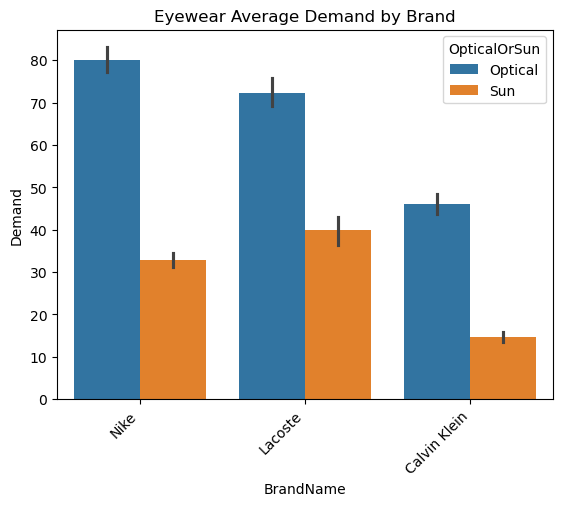

In [128]:
sns.barplot(data_4m_demand,x='BrandName',y='Demand',estimator='mean',hue='OpticalOrSun')
plt.xticks(rotation=45, ha='right')
plt.title('Eyewear Average Demand by Brand')

Text(0.5, 1.0, 'Eyewear Average Demand by Time')

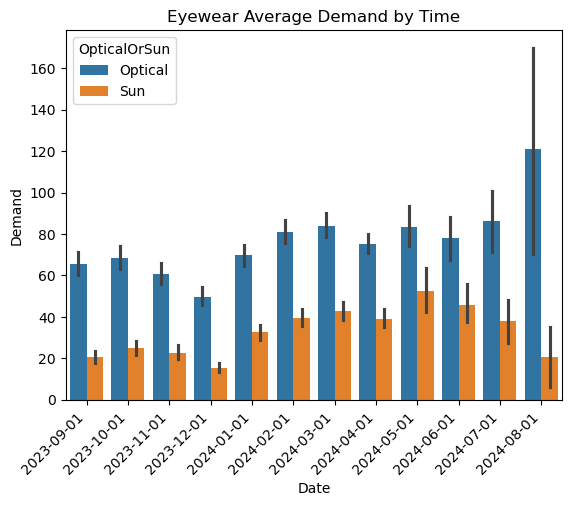

In [129]:
sns.barplot(data_4m_demand,x='Date',y='Demand',estimator='mean',hue='OpticalOrSun')
plt.xticks(rotation=45, ha='right')
plt.title('Eyewear Average Demand by Time')

Text(0.5, 1.0, 'Eyewear Average Demand by Summer')

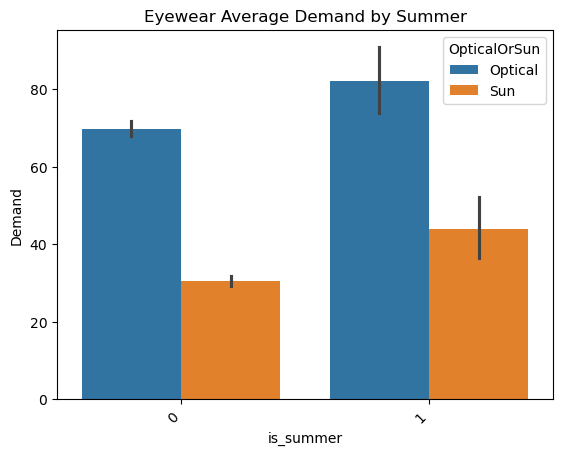

In [130]:
sns.barplot(data_4m_demand,x='is_summer',y='Demand',hue='OpticalOrSun',estimator='mean')
plt.xticks(rotation=45, ha='right')
plt.title('Eyewear Average Demand by Summer')

Text(0.5, 1.0, 'Eyewear Average Demand by Insurance Reset')

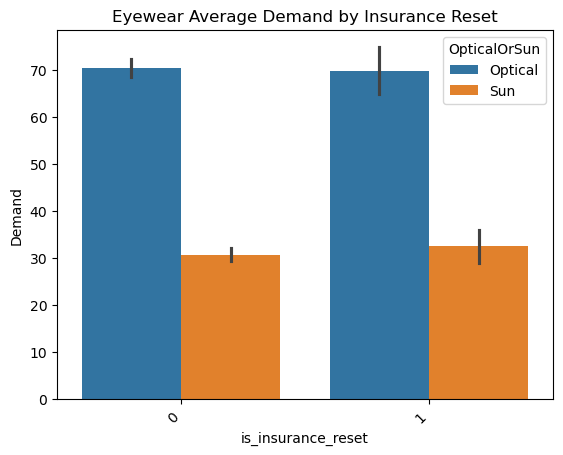

In [131]:
sns.barplot(data_4m_demand,x='is_insurance_reset',y='Demand',hue='OpticalOrSun',estimator='mean')
plt.xticks(rotation=45, ha='right')
plt.title('Eyewear Average Demand by Insurance Reset')

Text(0.5, 1.0, 'Eyewear Average Demand by Holdiays')

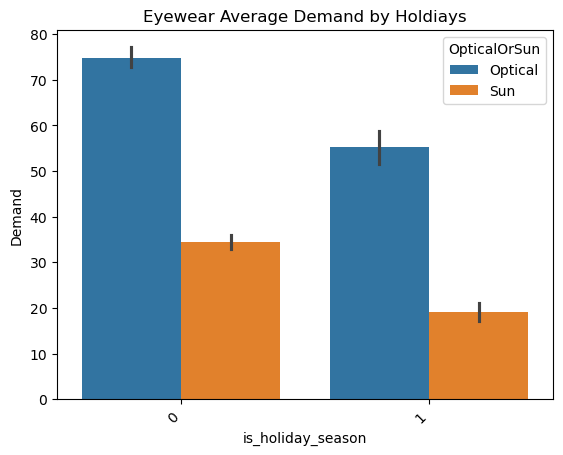

In [132]:
sns.barplot(data_4m_demand,x='is_holiday_season',y='Demand',hue='OpticalOrSun',estimator='mean')
plt.xticks(rotation=45, ha='right')
plt.title('Eyewear Average Demand by Holdiays')

Text(0.5, 1.0, 'Eyewear Average Demand by Color')

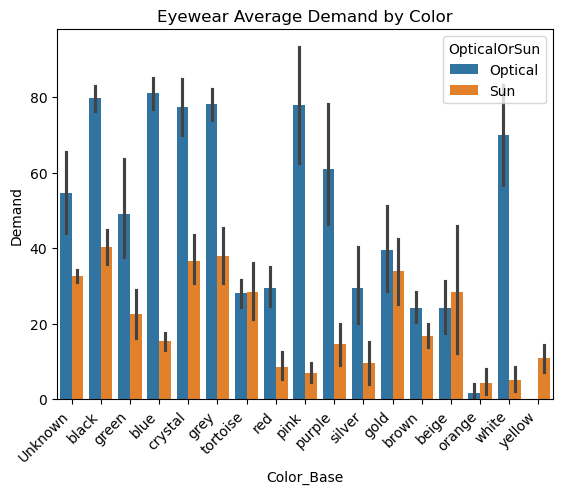

In [133]:
sns.barplot(data_4m_demand,x='Color_Base',y='Demand',estimator='mean',hue='OpticalOrSun')
plt.xticks(rotation=45, ha='right')
plt.title('Eyewear Average Demand by Color')

Text(0.5, 1.0, 'Eyewear Average Demand by Finish')

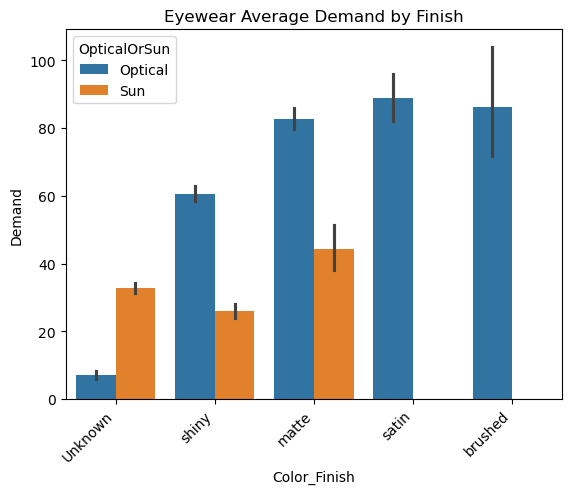

In [134]:
sns.barplot(data_4m_demand,x='Color_Finish',y='Demand',estimator='mean',hue='OpticalOrSun')
plt.xticks(rotation=45, ha='right')
plt.title('Eyewear Average Demand by Finish')

Text(0.5, 1.0, 'Eyewear Average Demand by Shape')

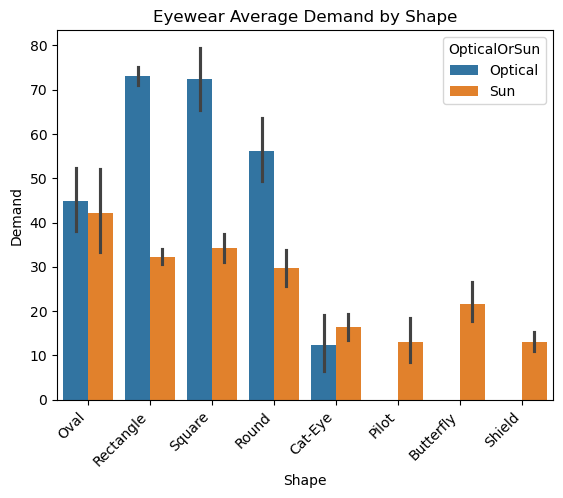

In [135]:
sns.barplot(data_4m_demand,x='Shape',y='Demand',estimator='mean',hue='OpticalOrSun')
plt.xticks(rotation=45, ha='right')
plt.title('Eyewear Average Demand by Shape')

Text(0.5, 1.0, 'Eyewear Average Demand by Frame Type')

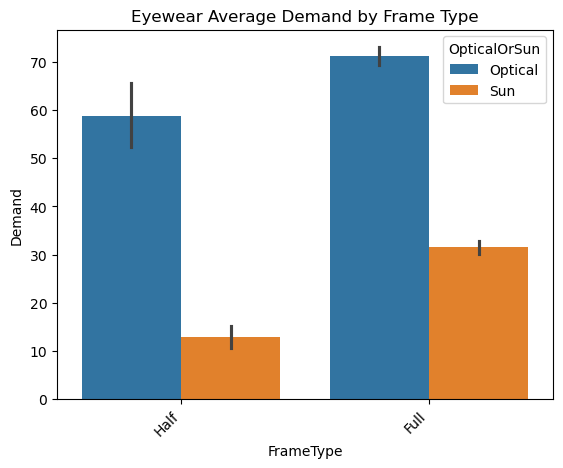

In [136]:
sns.barplot(data_4m_demand,x='FrameType',y='Demand',estimator='mean',hue='OpticalOrSun')
plt.xticks(rotation=45, ha='right')
plt.title('Eyewear Average Demand by Frame Type')

Text(0.5, 1.0, 'Eyewear Average Demand by Size')

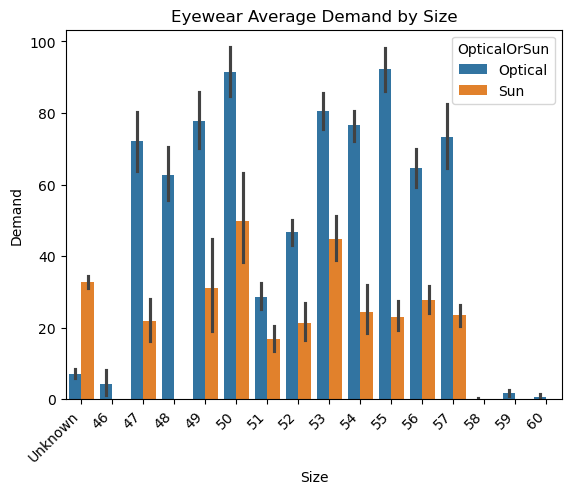

In [137]:
sns.barplot(data_4m_demand,x='Size',y='Demand',estimator='mean',hue='OpticalOrSun')
plt.xticks(rotation=45, ha='right')
plt.title('Eyewear Average Demand by Size')

Text(0.5, 1.0, 'Distribution of Demand')

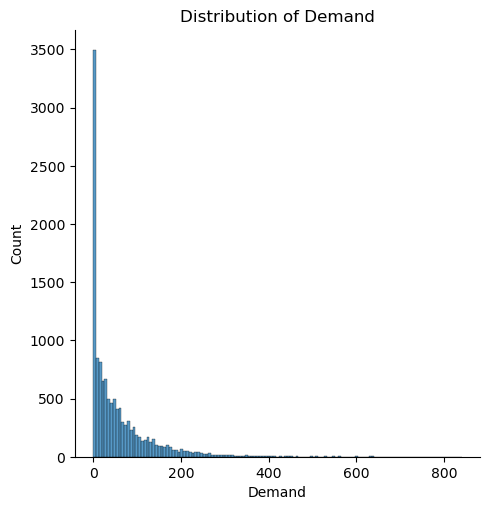

In [138]:
sns.displot(data_4m_demand,x='Demand')
plt.title('Distribution of Demand')

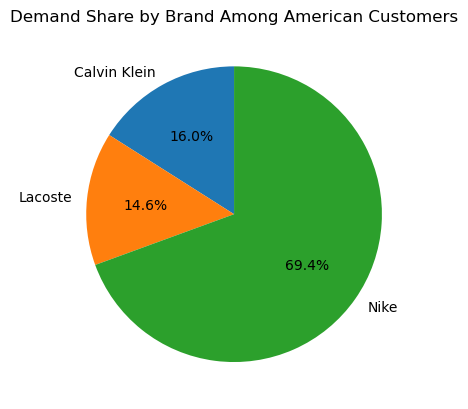

In [139]:
df = data_4m_demand[data_4m_demand['Region']=='AMER'].groupby('BrandName')['Demand'].sum()
plt.pie(df,labels=df.index,autopct='%1.1f%%',startangle=90)
plt.title('Demand Share by Brand Among American Customers')
plt.show()

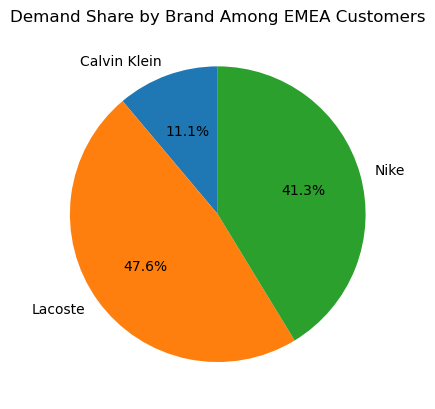

In [140]:
df = data_4m_demand[data_4m_demand['Region']=='EMEA'].groupby('BrandName')['Demand'].sum()
plt.pie(df,labels=df.index,autopct='%1.1f%%',startangle=90)
plt.title('Demand Share by Brand Among EMEA Customers')
plt.show()

In [142]:
data_4m_demand.columns

Index(['Collection', 'BrandLine', 'StyleCode', 'GridValue', 'Style', 'Region',
       'Size', 'Color', 'Demand', 'Color_Base', 'Color_Finish',
       'Is_Multicolor', 'OpticalOrSun', 'BrandName', 'Brand_Tier',
       'Lookalike_ID', 'Date', 'Glasses', 'Sunglasses', 'Glasses_3m_avg',
       'Sunglasses_3m_avg', 'Glasses_pct_change', 'Sunglasses_pct_change',
       'Trend_acetate_frame_glasses', 'Trend_Calvin_Klein_frames',
       'Trend_FSA_glasses', 'Trend_metal_frame_glasses',
       'Trend_Lacoste_frames', 'Trend_Nike_frames', 'Shape', 'FrameType',
       'Material', 'is_summer', 'is_holiday_season', 'is_insurance_reset',
       '4m_demand'],
      dtype='object')

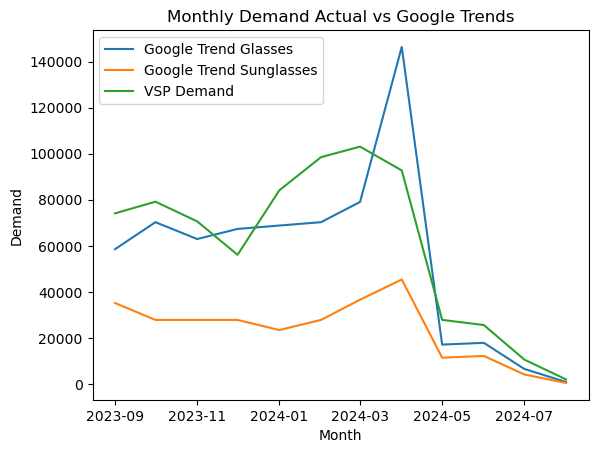

In [150]:
df = data_4m_demand.groupby('Date')['Glasses'].sum()
df2 = data_4m_demand.groupby('Date')['Sunglasses'].sum()
df3 = data_4m_demand.groupby('Date')['Demand'].sum()

plt.plot(df.index, df.values, label='Google Trend Glasses')
plt.plot(df2.index, df2.values, label='Google Trend Sunglasses')
plt.plot(df3.index, df3.values, label='VSP Demand')

plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Monthly Demand Actual vs Google Trends')
plt.legend() 

plt.show()